# Analyse des données DVF
*By DEBLOCK Vivien, CHA Elvin, COTELLA Vincent*

### Importation des librairies

In [12]:
# Traitement des dataframes
import pandas as pd
import unidecode
import numpy as np
import json


import seaborn as sns
# Création de graphiques
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import missingno as msno
import numpy as np


### Importation du dataset

In [3]:
df = pd.read_csv("https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt", sep = "|")
df.head()

C:\Users\vivsd\AppData\Local\Temp\ipykernel_16788\3350498679.py:1: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt", sep = "|")


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0


### Nettoyage des données

graphique représentant le pourcentage de valeurs non vides par colonne :

C:\Users\vivsd\AppData\Local\Temp\ipykernel_16788\692368028.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


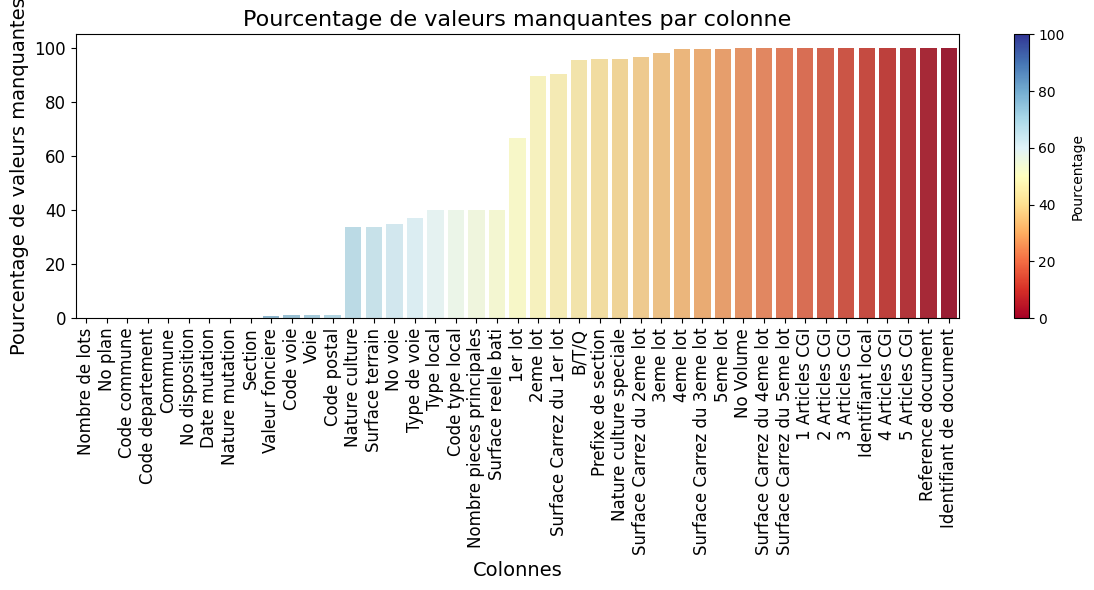

In [4]:
# calculer le pourcentage de valeurs manquantes par colonne
missing_percentages = df.isnull().sum() / df.shape[0] * 100

# trier les colonnes par ordre croissant
missing_percentages = missing_percentages.sort_values()

# définir la palette de couleurs pour le graphique
palette = sns.color_palette("RdYlBu", len(missing_percentages))[::-1]

# tracer le graphique en barres
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=missing_percentages.index, y=missing_percentages.values, order=missing_percentages.index,
            palette=palette)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Colonnes", fontsize=14)
plt.ylabel("Pourcentage de valeurs manquantes", fontsize=14)
plt.title("Pourcentage de valeurs manquantes par colonne", fontsize=16)
plt.tight_layout()

# ajouter l'échelle de couleur à droite du graphique
sm = plt.cm.ScalarMappable(cmap="RdYlBu", norm=plt.Normalize(vmin=0, vmax=100))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label("Pourcentage")


suppression des doublons de lignes

In [5]:
df=df.drop_duplicates()
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0


Suppression des données vides ou inutiles

In [6]:
 # Supprimer une ou plusieurs colonnes en utilisant le nom ou l'indice des colonnes
df = df.drop(['Identifiant de document', 'Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI',
              '4 Articles CGI','5 Articles CGI','No disposition','Prefixe de section','Section','No plan',
              'No Volume','1er lot','Surface Carrez du 1er lot','2eme lot','Surface Carrez du 2eme lot','3eme lot',
              'Surface Carrez du 3eme lot','4eme lot','Surface Carrez du 4eme lot','5eme lot','Surface Carrez du 5eme lot'
              ,'B/T/Q','Nombre de lots','Identifiant local'], axis=1)
df = df.dropna(subset=['Surface terrain'])
df.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,NaN,NaN,NaN,S,NaN,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,NaN,NaN,NaN,S,NaN,88.0
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,243,NaN,NaN,NaN,NaN,T,NaN,510.0
5,06/01/2022,Vente,"255000,00",282.0,RTE,0130,DE POISATON,1560.0,MANTENAY-MONTLIN,1,230,1.0,Maison,108.0,5.0,S,NaN,649.0
6,06/01/2022,Vente,"255000,00",NaN,NaN,B047,LA FREGONIERE,1560.0,MANTENAY-MONTLIN,1,230,NaN,NaN,NaN,NaN,S,NaN,360.0


Modification du type de données

In [7]:

# Convertir la colonne 'Date mutation' en datetime
if df['Date mutation'].dtype != 'datetime64[ns]':
    df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')
        
# Remplacer les virgules par des points dans la colonne 'Valeur fonciere' pour convertir en float       
if df['Valeur fonciere'].dtype != 'float64':
    df['Valeur fonciere'] = df["Valeur fonciere"].str.replace(",", ".").astype(float)

df['Code departement'] = df['Code departement'].astype(str)

#remplacement des valeurs nulles dans "Nombre pieces principales" par des 0
df["Nombre pieces principales"] = df["Nombre pieces principales"].fillna(0)
df.dtypes

Date mutation                datetime64[ns]
Nature mutation                      object
Valeur fonciere                     float64
No voie                             float64
Type de voie                         object
Code voie                            object
Voie                                 object
Code postal                         float64
Commune                              object
Code departement                     object
Code commune                          int64
Code type local                     float64
Type local                           object
Surface reelle bati                 float64
Nombre pieces principales           float64
Nature culture                       object
Nature culture speciale              object
Surface terrain                     float64
dtype: object

Ajout de données

In [8]:
### le prix du m²
df['Prix du metre carre'] = df['Valeur fonciere'] / df['Surface terrain']
df.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Prix du metre carre
1,2022-01-03,Vente,143000.0,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,NaN,NaN,0.0,S,NaN,84.0,1702.380952
2,2022-01-03,Vente,143000.0,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,NaN,NaN,0.0,S,NaN,88.0,1625.000000
4,2022-01-04,Vente,300.0,NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,243,NaN,NaN,NaN,0.0,T,NaN,510.0,0.588235
5,2022-01-06,Vente,255000.0,282.0,RTE,0130,DE POISATON,1560.0,MANTENAY-MONTLIN,1,230,1.0,Maison,108.0,5.0,S,NaN,649.0,392.912173
6,2022-01-06,Vente,255000.0,NaN,NaN,B047,LA FREGONIERE,1560.0,MANTENAY-MONTLIN,1,230,NaN,NaN,NaN,0.0,S,NaN,360.0,708.333333


Voici le nombre de lignes et colonnes que nous allons analyser sur ce dataset

In [12]:
pd.DataFrame({'Nombre de lignes': [df.shape[0]], 'Nombre de colonnes':[ df.shape[1]]})

,Nombre de lignes,Nombre de colonnes
0,2301825,19


### Etude de la Corrélation entre nos variable

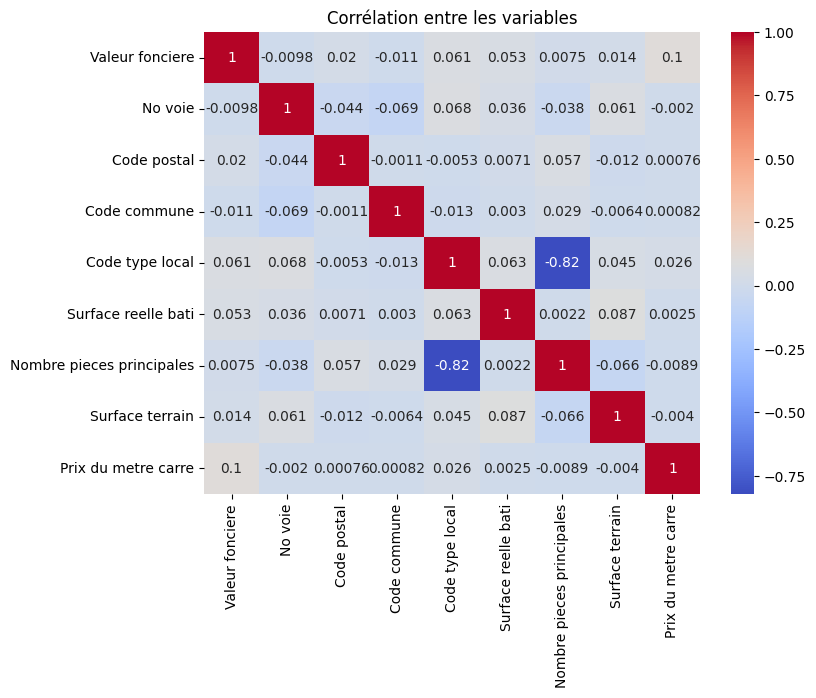

In [13]:
# Sélection des colonnes numériques
df_numeric = df.select_dtypes(include="number")

# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)

# Ajout des labels et titre
ax.set_title("Corrélation entre les variables")

# Affichage du graphique
plt.show()

Nous pouvons observer qu'il y a une corrélation négative entre le type de local et le nombre de pièces principales. Représentons ça par des graphiques.

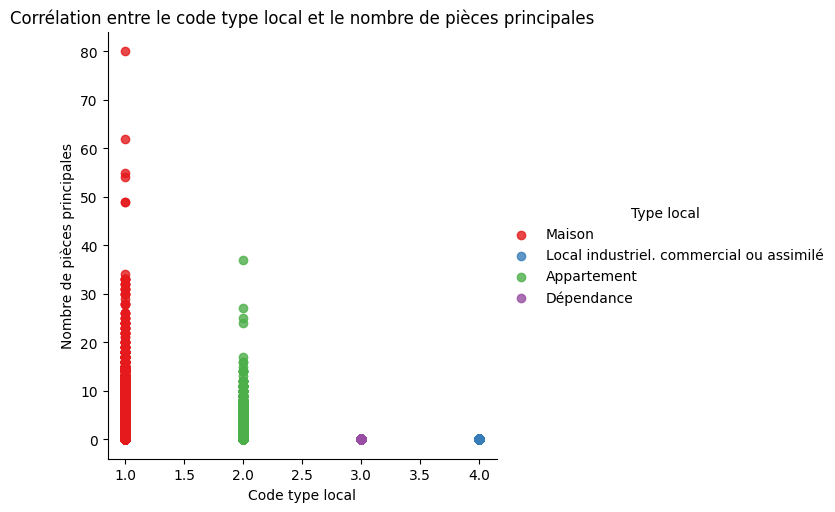

In [14]:
# Création du graphique
sns.lmplot(x="Code type local", y="Nombre pieces principales", hue="Type local", palette="Set1", data=df)

# Ajout des labels et titre
plt.xlabel("Code type local")
plt.ylabel("Nombre de pièces principales")
plt.title("Corrélation entre le code type local et le nombre de pièces principales")

# Affichage du graphique
plt.show()

Représentons cela par une boite à moustache pour avoir plus d'informations

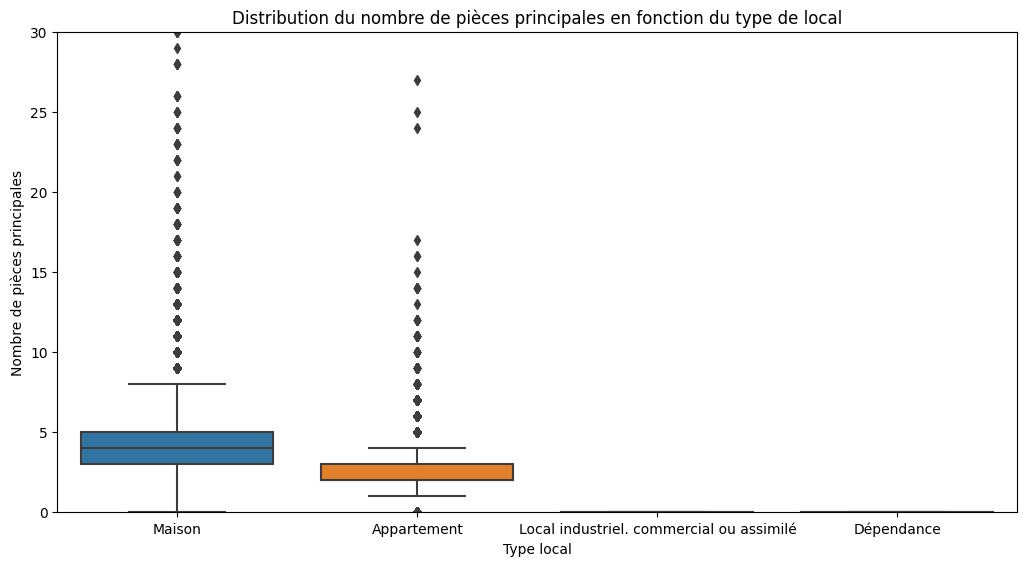

In [15]:
# Trier les données par ordre décroissant de la variable "Nombre pieces principales"
df_sorted = df.sort_values(by="Nombre pieces principales", ascending=False)

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Type local", y="Nombre pieces principales", data=df_sorted, ax=ax)

# Ajout des labels et titre
plt.xlabel("Type local")
plt.ylabel("Nombre de pièces principales")
plt.title("Distribution du nombre de pièces principales en fonction du type de local")

# Définition des limites de l'axe y
ax.set_ylim(0, 30)

# Ajustement des marges
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Affichage du graphique
plt.show()

Les données sont cohérentes. Les maisons ont naturellement plus de pièces principales de les appartements et les dépendances et les locaux industriels n'en ont pas

Répartition des biens

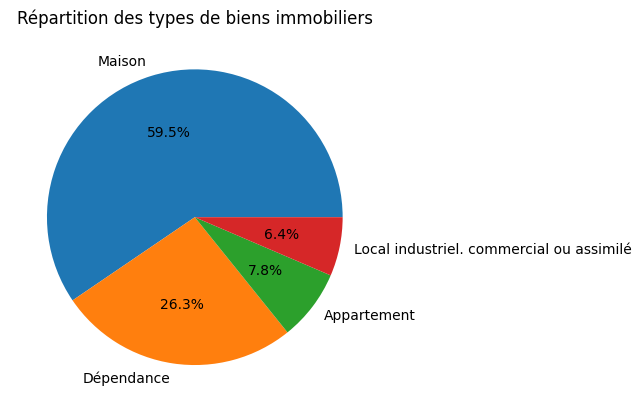

In [61]:
# Calculer la répartition des types de biens immobiliers
type_counts = df['Type local'].value_counts()

# Afficher un graphique en camembert
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Répartition des types de biens immobiliers')
plt.show()

### Focus sur l'immobiier

Valeur foncière, surface terrain et prix du m² par département

In [58]:
data1=df[["Code departement","Valeur fonciere","Surface terrain", "Prix du metre carre"]]
data1=data1[(data1["Surface terrain"]>0)]
data1.sort_values(by="Prix du metre carre", ascending=False)

data1= data1.groupby(["Code departement"])[["Valeur fonciere","Surface terrain","Prix du metre carre"]].mean()
data1.style.background_gradient(cmap='Reds')

,Valeur fonciere,Surface terrain,Prix du metre carre
Code departement,,,
1,309604.877650,1787.710726,5270.618853
10,204066.000658,2781.463165,1769.748795
11,196427.134624,3006.608128,1249.618147
12,132513.861307,3020.277423,727.449184
13,850447.079670,1778.272928,8092.895662
14,331211.182742,5217.530278,2117.842398
15,112166.198963,4439.682245,593.696703
16,200981.964356,3061.426161,2078.411832
17,258568.386229,2012.250719,2999.886077


Carte de la france (une pour les valeurs foncières et une pour le prix du m²)

In [52]:
df_dep = df.groupby("Code departement")["Code departement"].count().to_frame(name = 'Valeur foncière').reset_index()
dep_geo = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
fig = px.choropleth_mapbox(df_dep,
                           geojson=dep_geo,
                           featureidkey="properties.code",
                           locations='Code departement',
                           mapbox_style="carto-positron",
                           color='Valeur foncière',
                           color_continuous_scale="Viridis",
                           zoom=4.25, center = {"lat": 46.4, "lon": 2.2},
                           opacity=0.5
                          )

fig.update_layout(
    title={
        'text': "Valeur foncière en fonction du département en 2022",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show()


In [53]:
df_dep = df.groupby("Code departement")["Code departement"].count().to_frame(name = 'Prix du metre carre').reset_index()
dep_geo = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
fig = px.choropleth_mapbox(df_dep,
                           geojson=dep_geo,
                           featureidkey="properties.code",
                           locations='Code departement',
                           mapbox_style="carto-positron",
                           color='Prix du metre carre',
                           color_continuous_scale="Viridis",
                           zoom=4.25, center = {"lat": 46.4, "lon": 2.2},
                           opacity=0.5
                          )

fig.update_layout(
    title={
        'text': "Valeur foncière en fonction du département en 2022",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show()

prix moyen du m² par département avec un input

In [49]:
df_filtered = df[df['Surface terrain'] > 0]
# Enlever les lignes avec des valeurs nulles pour la surface du terrain


# Demander à l'utilisateur de saisir un département
departement = input("Entrez le code du département : ")

# Filtrer le dataframe pour ne garder que les lignes correspondant au département saisi
df_departement = df_filtered.loc[df_filtered['Code departement'] == departement]

# Calculer le prix moyen du mètre carré pour le département saisi
prix_moyen_par_m2 = df_departement['Prix du metre carre'].mean()

# Afficher le résultat
print("Le prix moyen du mètre carré pour le département", departement, "est de", prix_moyen_par_m2, "euros.")


Le prix moyen du mètre carré pour le département 4 est de 1352.8378363020047 euros.


Valeur foncière moyenne, superficie moyenne et prix moyen au mètre carré par type de bien

In [31]:
temp=df[["Type local","Valeur fonciere","Surface terrain", "Prix du metre carre"]]
temp=temp[(temp["Surface terrain"]>0)]
temp.sort_values(by="Prix du metre carre", ascending=False)

temp = temp.groupby(['Type local'])[['Valeur fonciere', 'Surface terrain', 'Prix du metre carre']].mean()
temp.style.background_gradient(cmap='Reds')

,Valeur fonciere,Surface terrain,Prix du metre carre
Type local,,,
Appartement,2158764.716919,1044.601975,6299.799348
Dépendance,398021.825775,948.940371,1766.800117
Local industriel. commercial ou assimilé,3063876.709790,3538.126713,3868.267730
Maison,334352.991615,916.637419,966.010515


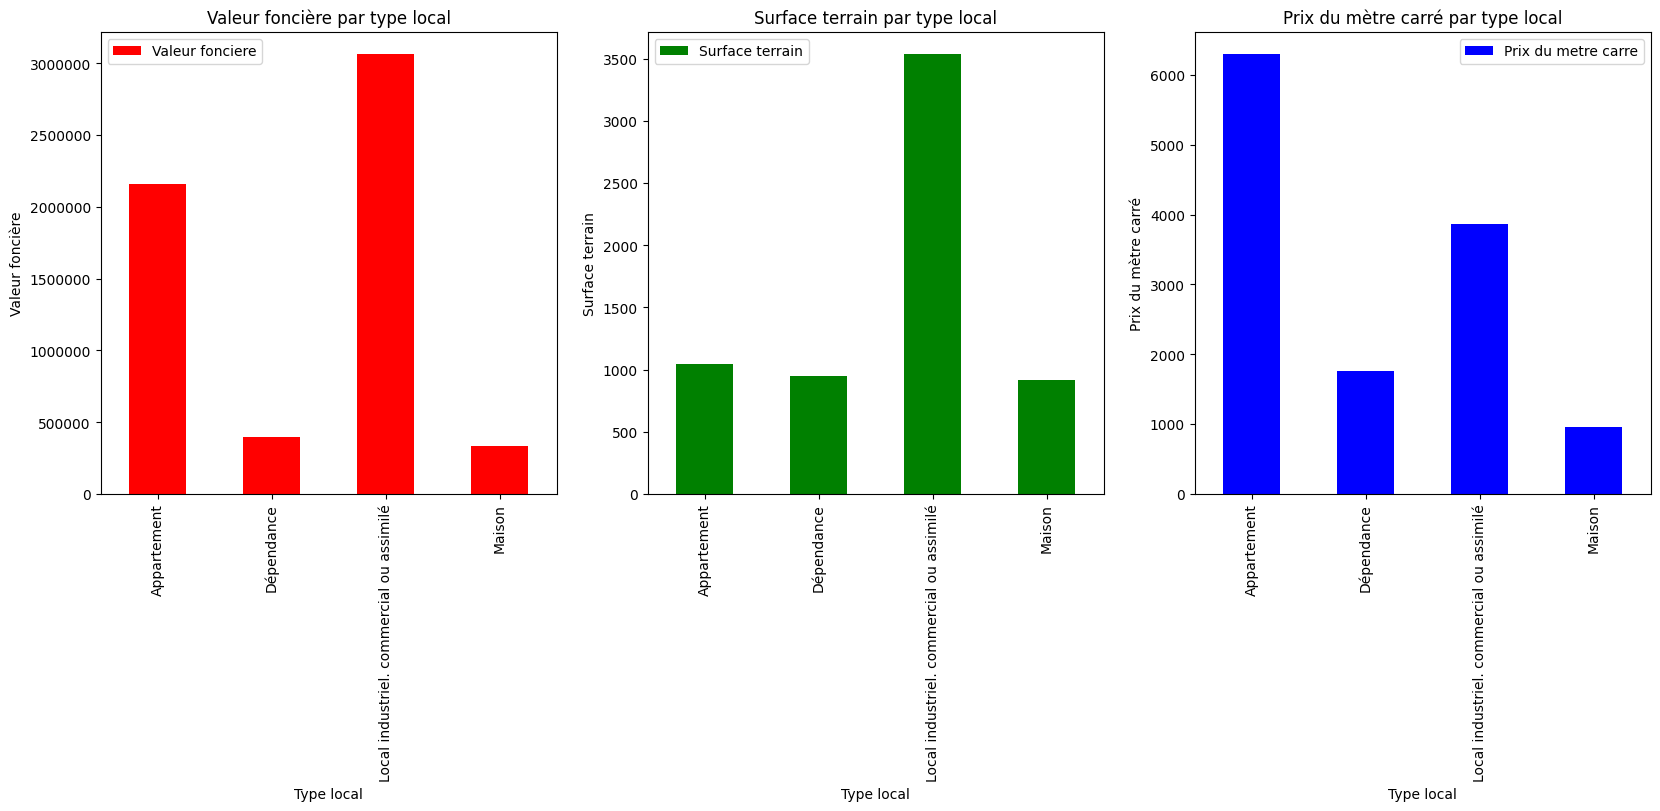

In [35]:
# Créer une figure et des axes
fig, axs = plt.subplots(ncols=3, figsize=(20,6))

# Graphique 1 : Valeur foncière par type local
temp.plot.bar(y='Valeur fonciere', ax=axs[0], color='red')
axs[0].set_xlabel('Type local')
axs[0].set_ylabel('Valeur foncière')
axs[0].set_title('Valeur foncière par type local')
axs[0].ticklabel_format(style='plain', axis='y')

# Graphique 2 : Surface terrain par type local
temp.plot.bar(y='Surface terrain', ax=axs[1], color='green')
axs[1].set_xlabel('Type local')
axs[1].set_ylabel('Surface terrain')
axs[1].set_title('Surface terrain par type local')
axs[1].ticklabel_format(style='plain', axis='y')

# Graphique 3 : Prix du mètre carré par type local
temp.plot.bar(y='Prix du metre carre', ax=axs[2], color='blue')
axs[2].set_xlabel('Type local')
axs[2].set_ylabel('Prix du mètre carré')
axs[2].set_title('Prix du mètre carré par type local')
axs[2].ticklabel_format(style='plain', axis='y')

# Afficher la figure
plt.show()

Prix au m² par nombre de pièce principale

In [35]:
# Création d'un DataFrame temporaire avec les colonnes "Type local", "Valeur fonciere" et "Surface terrain"
temp = df[["Valeur fonciere", "Surface terrain", "Nombre pieces principales"]]

# Filtrage des données pour exclure les biens avec une surface terrain <= 0
temp = temp[temp["Surface terrain"] > 0]

# Calcul de la valeur foncière moyenne par mètre carré pour chaque bien
temp["prix m2"] = temp["Valeur fonciere"] / temp["Surface terrain"]

# Groupement des données par nombre de pièce principale et calcul de la valeur foncière moyenne par bien
temp = temp.groupby(["Nombre pieces principales"])["prix m2"].mean().reset_index()

# Affichage du tableau
temp.style.background_gradient(cmap='Reds')

,Nombre pieces principales,prix m2
0,0.000000,4908.070051
1,1.000000,2847.244252
2,2.000000,2582.862667
3,3.000000,2013.432825
4,4.000000,1359.407307
5,5.000000,1024.825436
6,6.000000,940.703026
7,7.000000,1087.179243
8,8.000000,1223.719394
9,9.000000,1581.837015


tableau du nombre de vente par département

In [56]:
#pas fait

Evolution du nombre de vente au cours de l'année

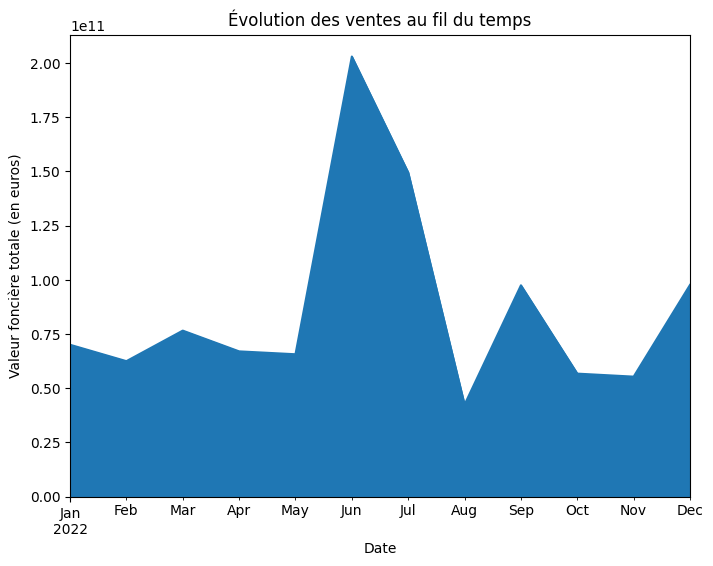

In [ ]:
# Agrégation des ventes par mois
sales_by_month = df.resample('M', on='Date mutation')['Valeur fonciere'].sum()

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
sales_by_month.plot(kind="area", ax=ax)

# Ajout des labels et titre
ax.set_xlabel("Date")
ax.set_ylabel("Valeur foncière totale (en euros)")
ax.set_title("Évolution des ventes au fil du temps")

# Affichage du graphique
plt.show()

Et par type de bien

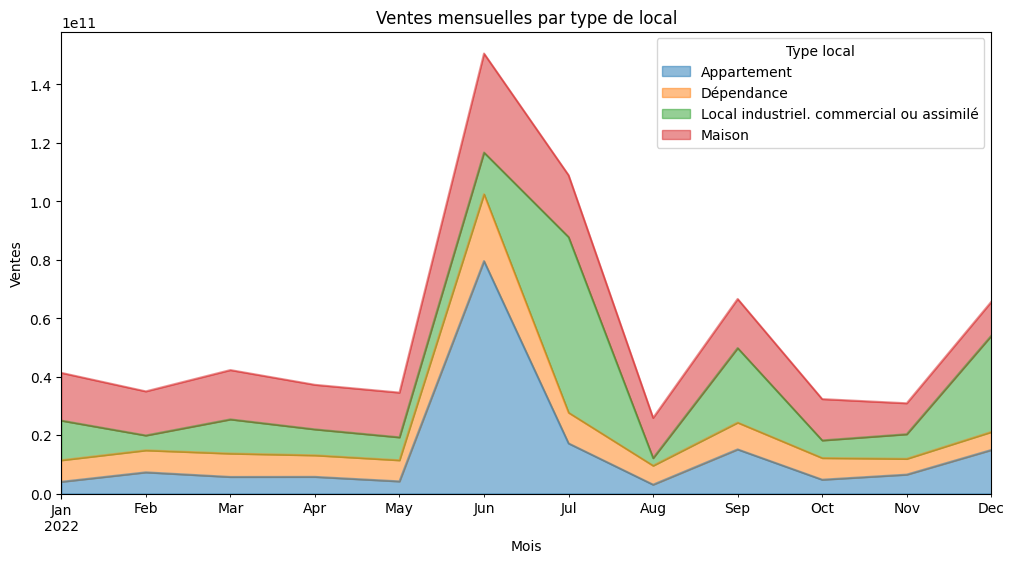

In [ ]:
# Calcul des ventes par produit et par mois
sales_by_product_month = df.groupby(["Type local", pd.Grouper(key="Date mutation", freq="M")])["Valeur fonciere"].sum()

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))
sales_by_product_month.unstack(level=0).plot.area(ax=ax, alpha=0.5)

# Ajout des labels et titre
ax.set_xlabel("Mois")
ax.set_ylabel("Ventes")
ax.set_title("Ventes mensuelles par type de bien")

# Affichage du graphique
plt.show()

In [60]:
data2=df.groupby(['Date mutation','Type local']).size().reset_index(name='Nombre de transactions')
fig = px.bar(data2, x="Date mutation", y="Nombre de transactions", color='Type local', orientation='v', height=600,
             title='Nombre de transactions immobilières en 2022',color_discrete_sequence = px.colors.cyclical.mygbm)
fig.update_layout(xaxis_title='Date',legend_title="Type de biens")
fig.show()

Nombre de ventes cumulés au cours de l'année

In [33]:
temp=df.groupby(['Date mutation']).size().reset_index(name='Nombre de transactions')
temp['nombre cumulé']=temp['Nombre de transactions'].cumsum()
px.line(temp, x="Date mutation", y="nombre cumulé", height=600,title="Nombre de ventes cumulées au cours de l'année")

Realtion entre la surface du terrain et le prix de vente

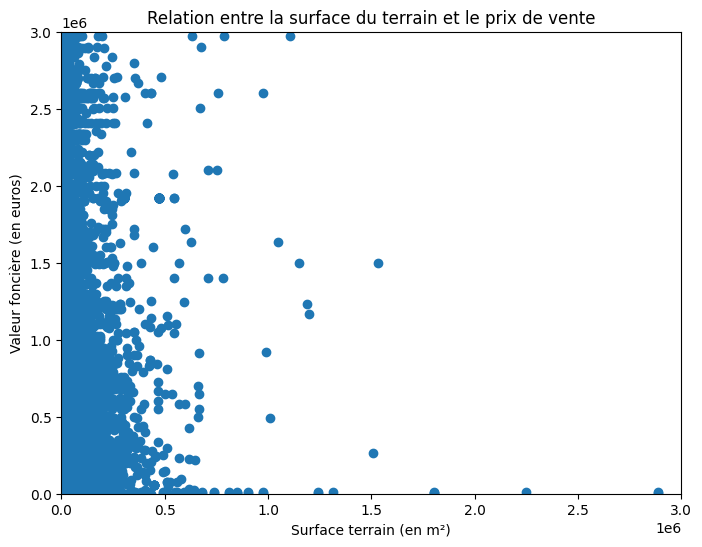

In [36]:
# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df["Surface terrain"], df["Valeur fonciere"])

# Limiter les axes à 3 millions en abscisse et en ordonnée
ax.set_xlim([0, 3000000])
ax.set_ylim([0, 3000000])

# Ajout des labels et titre
ax.set_xlabel("Surface terrain (en m²)")
ax.set_ylabel("Valeur foncière (en euros)")
ax.set_title("Relation entre la surface du terrain et le prix de vente")

# Affichage du graphique
plt.show()

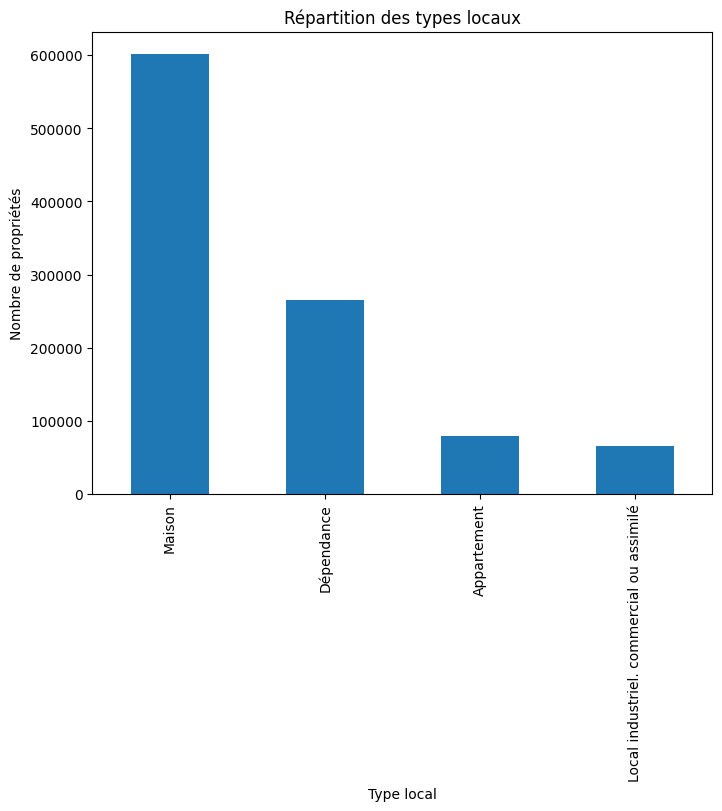

In [49]:
# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
df['Type local'].value_counts().plot(kind='bar', ax=ax)

# Ajout des labels et titre
ax.set_xlabel("Type local")
ax.set_ylabel("Nombre de propriétés")
ax.set_title("Répartition des types locaux")

# Affichage du graphique
plt.show()